In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\Denil\MEGA Project\athlete_events.csv")
region_df = pd.read_csv(r"D:\Denil\MEGA Project\noc_regions.csv")

In [3]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season'] == 'Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [8]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [9]:
df = df.merge(region_df,on='NOC',how='left')

In [10]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [11]:
df['region'].unique().shape

(206,)

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(1385)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [17]:
pd.get_dummies(df['Medal'],dtype=int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [18]:
df = pd.concat([df,pd.get_dummies(df['Medal'],dtype=int)],axis=1)

In [19]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [20]:
df[(df['NOC'] == 'IND') & (df['Medal']=='Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [21]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [22]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [23]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [24]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Vanuatu,0,0,0,0
201,"Virgin Islands, British",0,0,0,0
202,"Virgin Islands, US",0,1,0,1
203,Yemen,0,0,0,0


In [25]:
years = df['Year'].unique().tolist()

In [26]:
years.sort()

In [27]:
years.insert(0,'Overall')

In [28]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [29]:
country = np.unique(df['region'].dropna().values).tolist()

In [30]:
country.sort()

In [31]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [32]:
country.insert(0,'Overall')

In [33]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [34]:
def fetch_medal_tally(df,year,country):
    medel_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medel_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medel_df[medel_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medel_df[medel_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medel_df[(medel_df['Year'] == int(year)) & (medel_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x) 


In [35]:
fetch_medal_tally(df,year='1900',country='India')

  region  Gold  Silver  Bronze  total
0  India     0       2       0      2


Overall Analysis
no of edition
no of cities
no of athletes
participating nation 

In [36]:
df['Year'].unique().shape[0] -1

28

In [37]:
df['City'].unique().shape[0]

23

In [38]:
df['Sport'].unique().shape[0]

52

In [39]:
df['Event'].unique().shape[0]

651

In [40]:
df['Name'].unique().shape[0]

116122

In [41]:
df['region'].unique().shape[0]

206

In [42]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [43]:
nations_over_time.rename(columns={'Year': 'Edition', 'count': 'No of Nations'},inplace=True)

In [44]:
nations_over_time

,Edition,No of Nations
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


In [45]:
import plotly.express as px

In [46]:
fig = px.line(nations_over_time, x="Edition", y="No of Nations")
fig.show()

In [47]:
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [48]:
x = df.drop_duplicates(['Year','Sport','Event'])

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

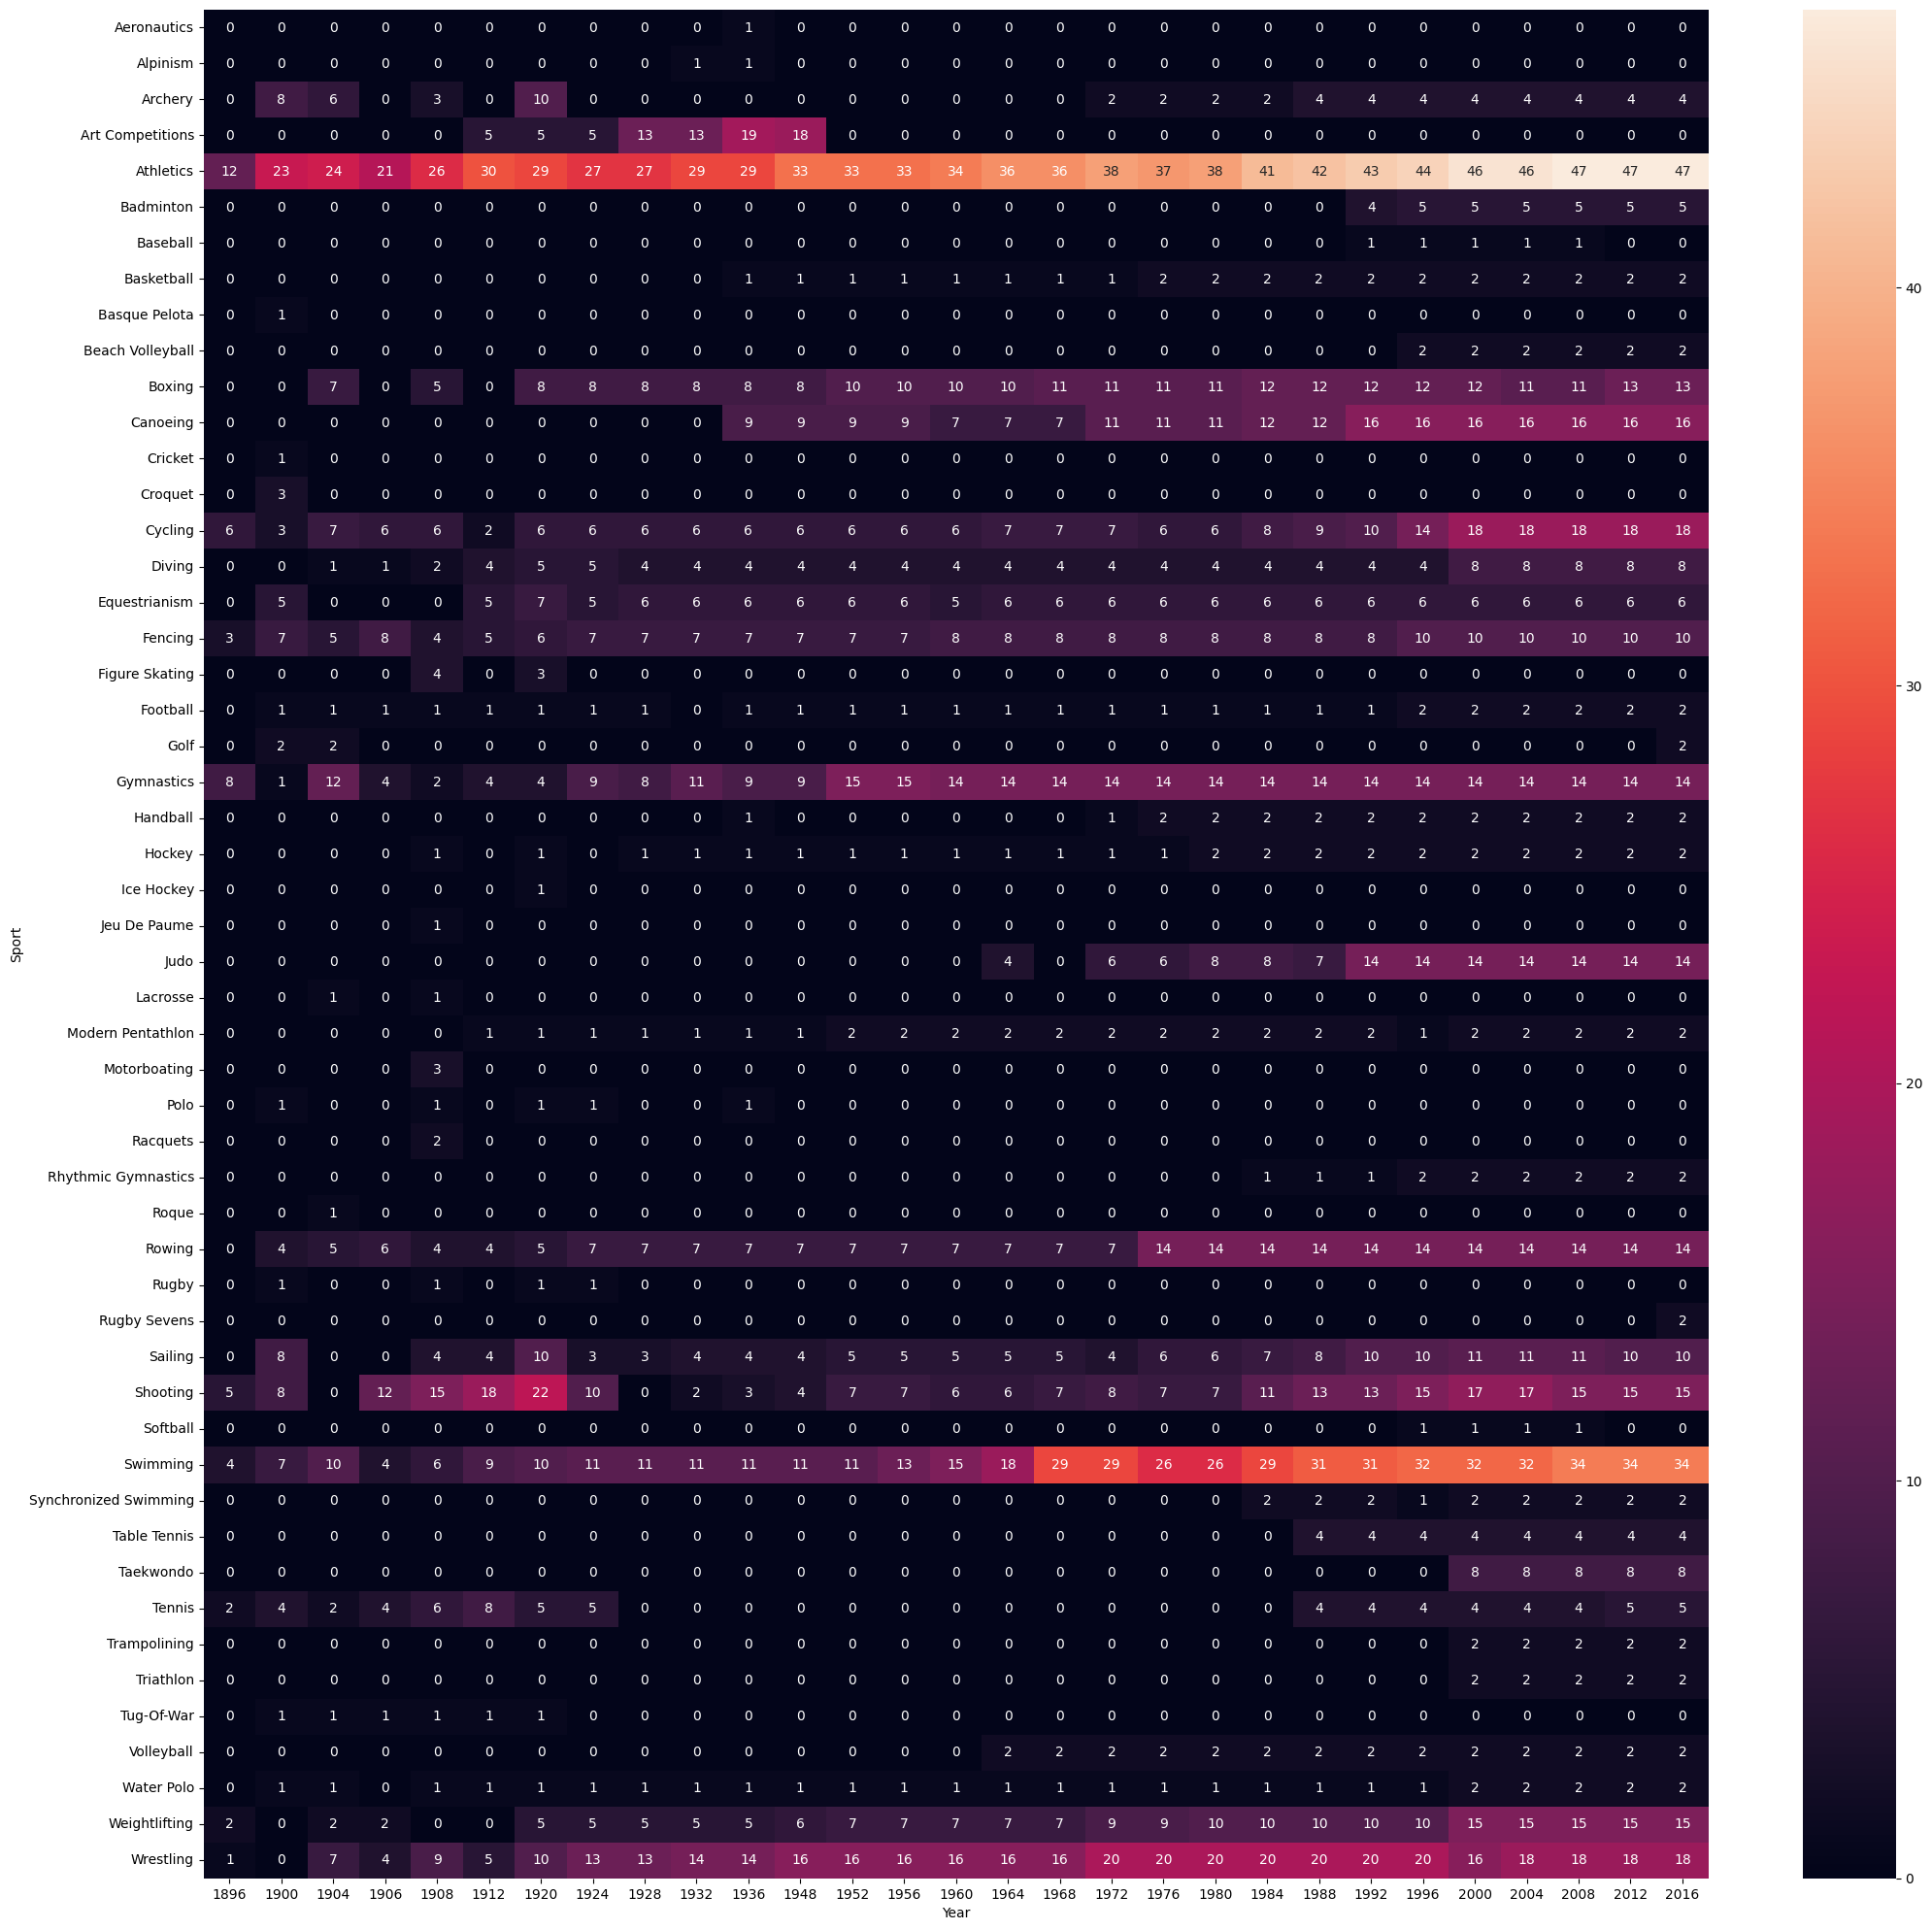

In [50]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [51]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != "Overall":
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [52]:
most_successful(df,'Swimming')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Ryan Steven Lochte,12,Swimming,USA
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
61,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
74,Natalie Anne Coughlin (-Hall),12,Swimming,USA
86,Mark Andrew Spitz,11,Swimming,USA
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
110,Franziska van Almsick,10,Swimming,Germany
133,"Gary Wayne Hall, Jr.",10,Swimming,USA
143,Aleksandr Vladimirovich Popov,9,Swimming,Russia


Country Wisw

In [53]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_16360\3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [55]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

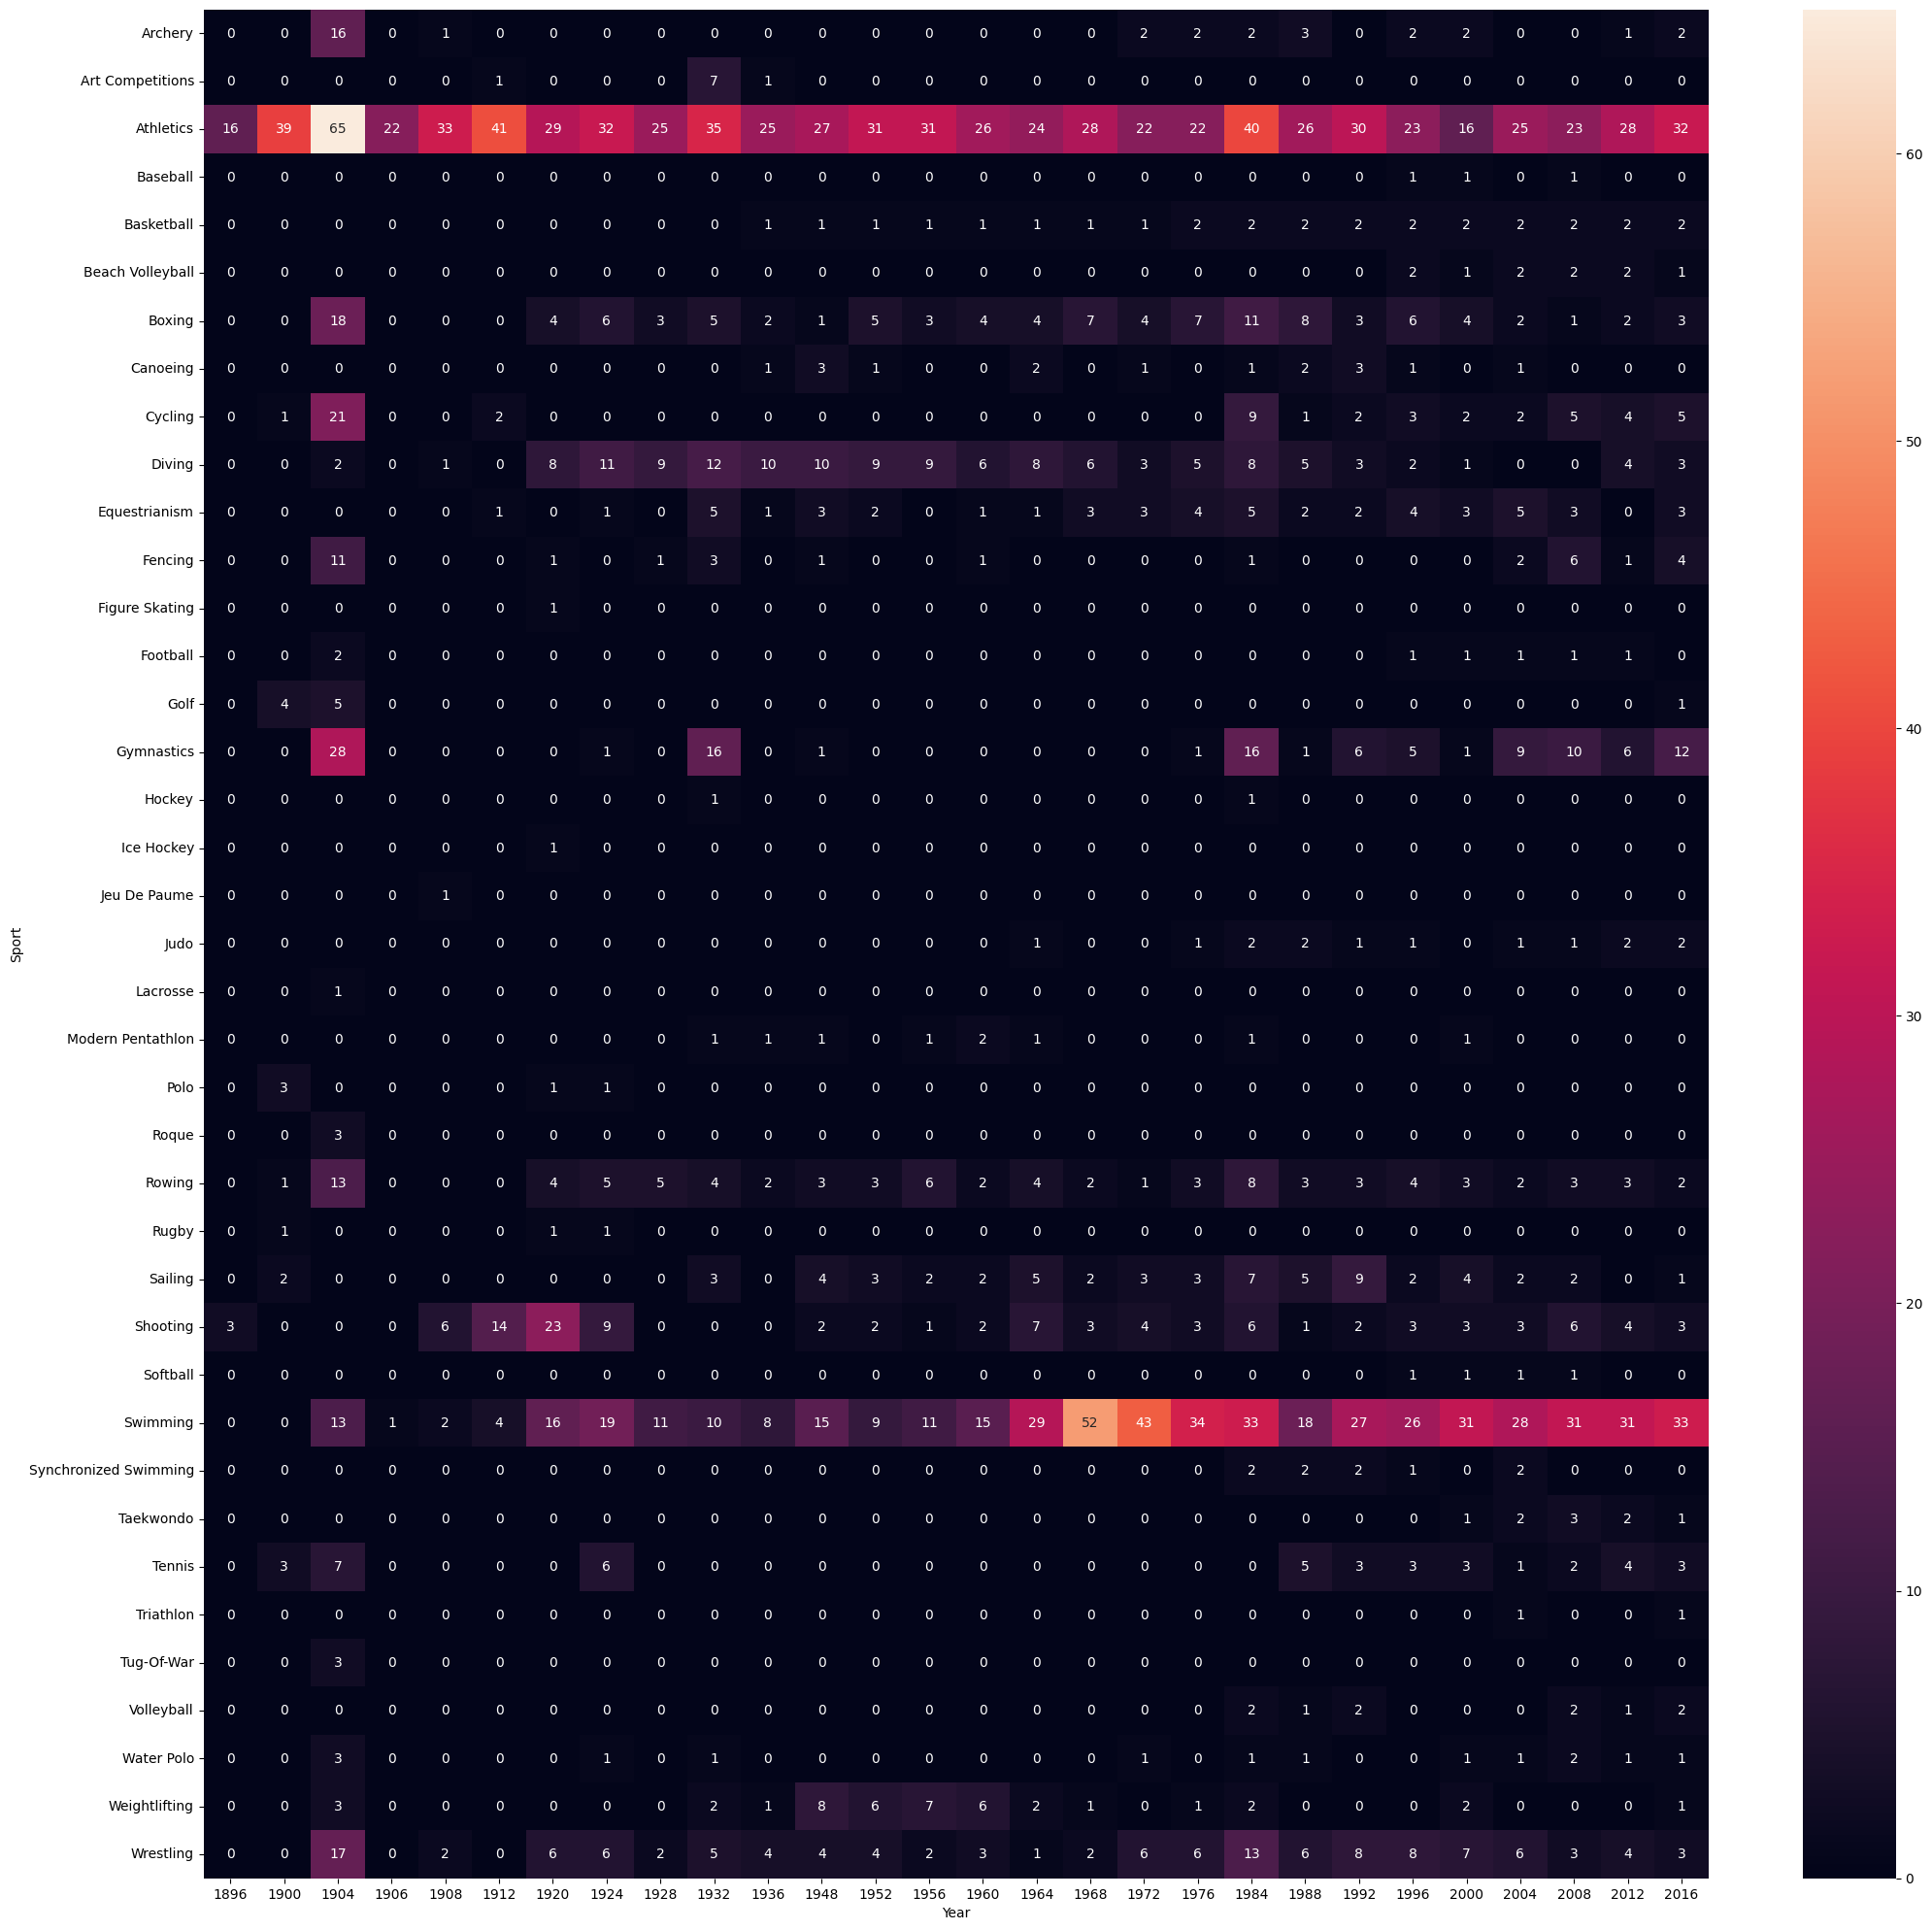

In [56]:
new_df = temp_df[temp_df['region'] == 'USA']
plt.figure(figsize=(25,25))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int),annot=True)

In [57]:
import plotly.figure_factory as ff

In [58]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [59]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [60]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze medalist'],show_hist=False,show_rug=False)
fig.show()

In [61]:
famous_sport = [
    'Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
    'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
    'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
    'Water Polo', 'Hockey', 'Rowing', 'Fencing',
    'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
    'Tennis', 'Golf', 'Softball', 'Archery',
    'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
    'Rhythmic Gymnastics', 'Rugby Sevens',
    'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey'
]

In [62]:
x = []
name = []
for sport in famous_sport:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [63]:
fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig.show()

In [64]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_16360\4160890072.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

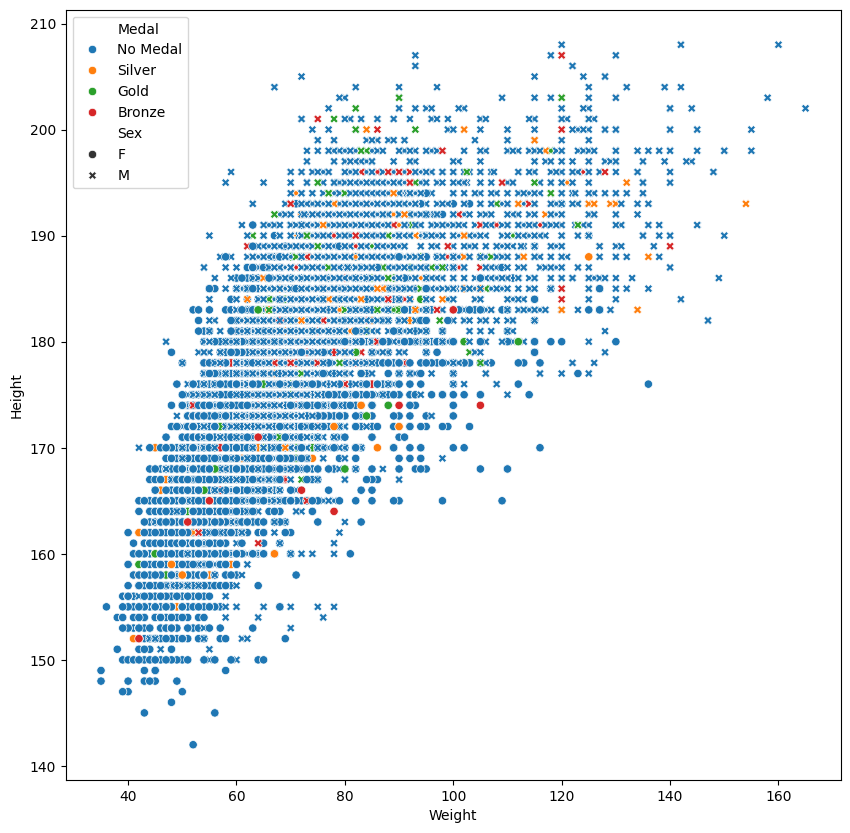

In [65]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'])

In [66]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [70]:
final = men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x' : 'Male', 'Name_y' : 'Female'},inplace=True)

In [72]:
final.fillna(0,inplace=True)

In [74]:
fig = px.line(final,x='Year',y =['Male','Female'])
fig.show()